# Procesamiento del dataframe (4FGL Catalog LogParabola UnIDs with Name)

In [90]:
%matplotlib inline

In [91]:
import pandas as pd

# Cargar los datos
file_path = "../data/processed/4FGL_catalog_clean.csv"
df = pd.read_csv(file_path)

# Verificar que la columna `source_name` sigue estando presente
print(df.dtypes)


Beta           float64
Beta_err       float64
E_peak[GeV]    float64
det_sig        float64
curv_sig       float64
source_name     object
dtype: object


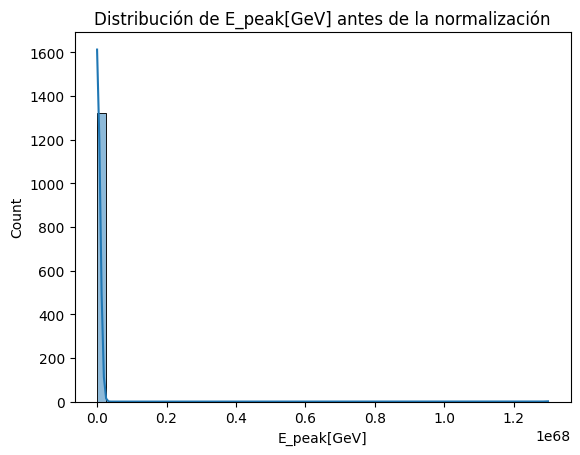

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ver la distribución antes de la normalización
sns.histplot(df["E_peak[GeV]"], bins=50, kde=True)
plt.title("Distribución de E_peak[GeV] antes de la normalización")
plt.show()

Excluir source_name al Convertir las Columnas Numéricas:

In [93]:
# Definir las columnas numéricas excluyendo 'source_name'
num_cols = ["Beta", "Beta_err", "E_peak[GeV]", "det_sig", "curv_sig"]

# Convertir las columnas numéricas si es necesario
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Verificar si hay valores NaN después de la conversión
print(df.isnull().sum())

Beta            0
Beta_err       63
E_peak[GeV]     0
det_sig         0
curv_sig        0
source_name     0
dtype: int64


In [94]:
import numpy as np

# Verificar si hay valores infinitos
print((df == np.inf).sum())   # Valores positivos infinitos
print((df == -np.inf).sum())  # Valores negativos infinitos

Beta           0
Beta_err       0
E_peak[GeV]    1
det_sig        0
curv_sig       0
source_name    0
dtype: int64
Beta           0
Beta_err       0
E_peak[GeV]    0
det_sig        0
curv_sig       0
source_name    0
dtype: int64


## Limpiar los datos

In [95]:
# Reemplazar valores infinito con el máximo valor posible
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convierte `inf` en `NaN`
df = df.dropna()  # Eliminar filas con `NaN`

Normalizar solo las columnas numéricas:

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Aplicar normalización SOLO en las columnas numéricas
# scaler = StandardScaler()
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Guardar el dataset normalizado sin afectar `source_name`
df.to_csv("../data/processed/4FGL_catalog_normalized.csv", index=False)

print("Datos normalizados y listos para el modelo de detección de anomalías.")

Datos normalizados y listos para el modelo de detección de anomalías.


Comprobar que source_name sigue presente en el dataset normalizado:

In [97]:
df_check = pd.read_csv("../data/processed/4FGL_catalog_normalized.csv")

# Revisar las primeras filas
print(df_check.head())

       Beta  Beta_err   E_peak[GeV]   det_sig  curv_sig   source_name
0  0.204561  0.034160  1.935531e-68  0.072298  0.041759  J0000.3-7355
1  0.489951  0.075179  1.138566e-68  0.029391  0.144644  J0003.3+2511
2  0.718892  0.058945  1.229608e-68  0.145620  0.302401  J0003.6+3059
3  0.368315  0.040714  7.170531e-69  0.076752  0.156210  J0004.0+5715
4  0.102587  0.015929  3.064007e-65  0.051031  0.024006  J0004.4-4001


In [98]:
# Revisar tipos de datos en el DataFrame
print(df.dtypes)

Beta           float64
Beta_err       float64
E_peak[GeV]    float64
det_sig        float64
curv_sig       float64
source_name     object
dtype: object


In [99]:
# Revisar si hay valores NaN
print(df.isnull().sum())

Beta           0
Beta_err       0
E_peak[GeV]    0
det_sig        0
curv_sig       0
source_name    0
dtype: int64


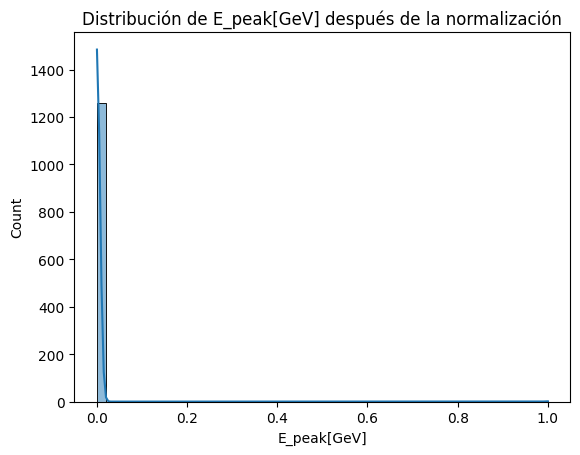

In [100]:
# Ver la distribución después de la normalización
sns.histplot(df["E_peak[GeV]"], bins=50, kde=True)
plt.title("Distribución de E_peak[GeV] después de la normalización")
plt.show()

# 📈 Visualización y Distribución de Datos


In [101]:
print('Primeras filas del archivo:')
df.head()

Primeras filas del archivo:


,Beta,Beta_err,E_peak[GeV],det_sig,curv_sig,source_name
0,0.204561,0.034160,1.935531e-68,0.072298,0.041759,J0000.3-7355
1,0.489951,0.075179,1.138566e-68,0.029391,0.144644,J0003.3+2511
2,0.718892,0.058945,1.229608e-68,0.145620,0.302401,J0003.6+3059
3,0.368315,0.040714,7.170531e-69,0.076752,0.156210,J0004.0+5715
4,0.102587,0.015929,3.064007e-65,0.051031,0.024006,J0004.4-4001


In [102]:
print('\nEstadísticas del archivo:')
df.describe()


Estadísticas del archivo:


,Beta,Beta_err,E_peak[GeV],det_sig,curv_sig
count,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000
mean,0.393808,0.040904,7.942812e-04,0.086579,0.187215
std,0.221582,0.047812,2.818299e-02,0.117124,0.140876
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.217363,0.020850,3.047062e-69,0.021064,0.080223
50%,0.361936,0.031129,6.966957e-69,0.048203,0.162195
75%,0.531545,0.049313,1.689209e-68,0.103806,0.259095
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000


## Distribución de las Variables (Histogramas)

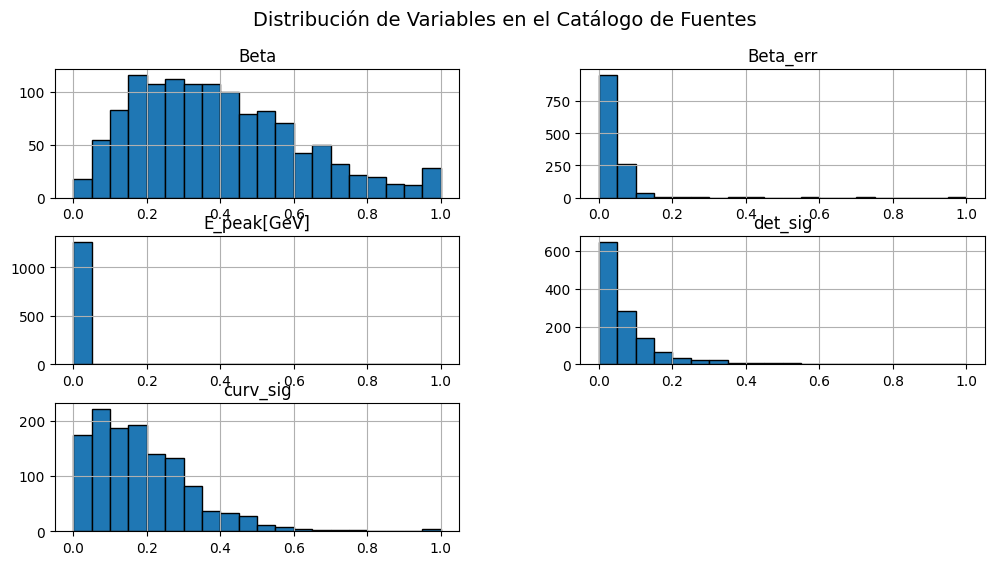

In [103]:
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
num_cols = ["Beta", "Beta_err", "E_peak[GeV]", "det_sig", "curv_sig"]

# Graficar histogramas
df[num_cols].hist(figsize=(12, 6), bins=20, edgecolor='black')
plt.suptitle("Distribución de Variables en el Catálogo de Fuentes", fontsize=14)
plt.show()

## Identificación de Valores Atípicos (Boxplots)

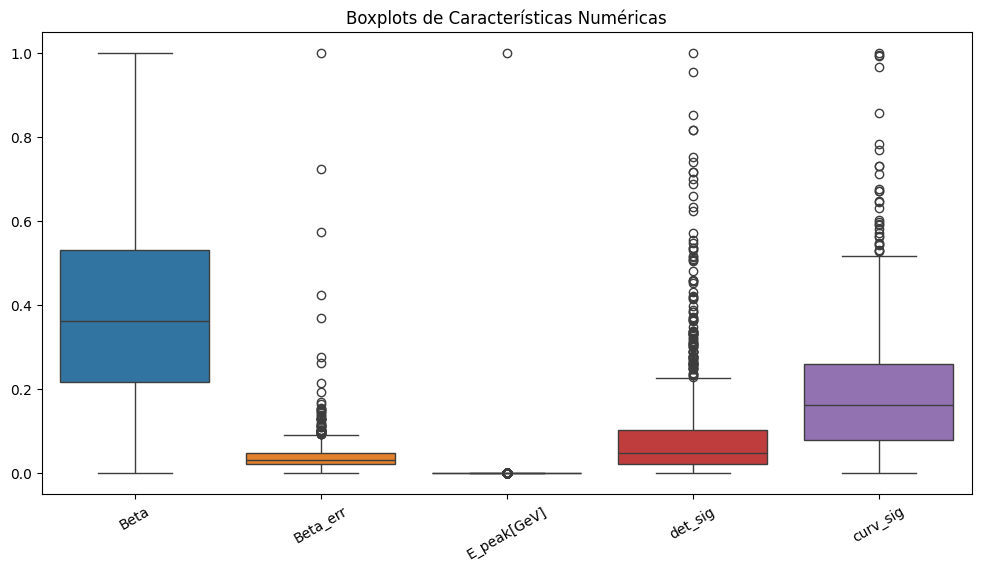

In [104]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=30)
plt.title("Boxplots de Características Numéricas")
plt.show()

## Correlaciones entre Variables (Heatmap)

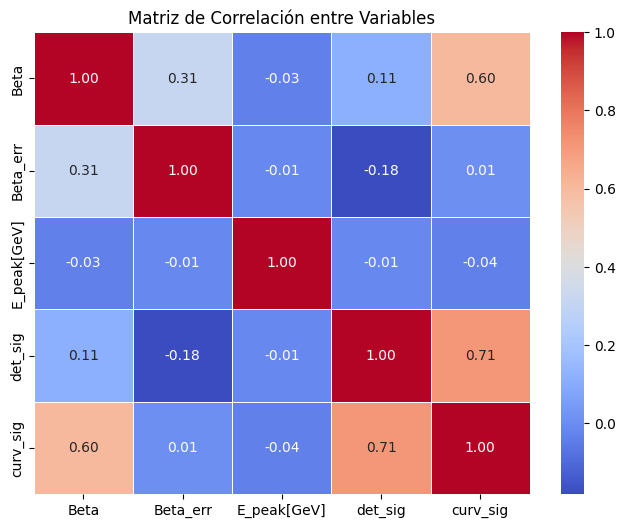

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

## Relación entre E_peak[GeV] y Beta (Scatter Plot)

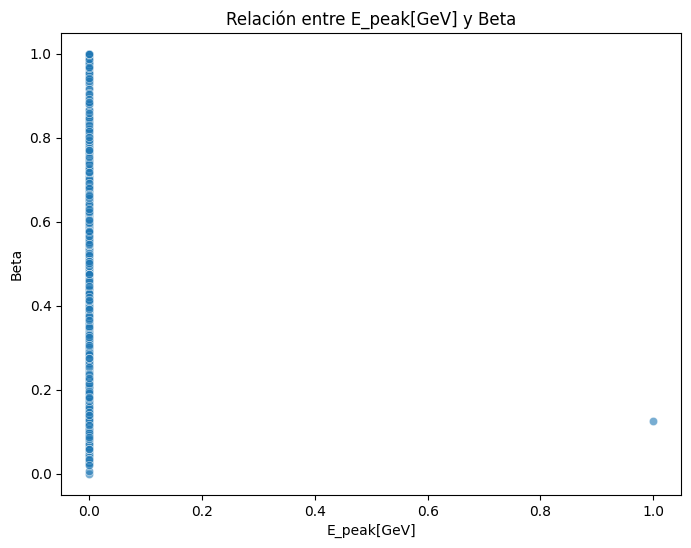

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["E_peak[GeV]"], y=df["Beta"], alpha=0.6)
plt.xlabel("E_peak[GeV]")
plt.ylabel("Beta")
plt.title("Relación entre E_peak[GeV] y Beta")
plt.show()